In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

In [38]:
df_google = pd.read_csv("GOOG.csv")
df_google.head()

,date,open,high,low,close,volume
0,2014-03-27,28.4000,28.4000,27.6460,27.9230,262000
1,2014-03-28,28.0600,28.3215,27.9335,27.9995,822000
2,2014-03-31,28.3445,28.3500,27.8465,27.8485,216000
3,2014-04-01,27.9355,28.4225,27.9355,28.3580,158000
4,2014-04-02,28.2553,30.2415,28.1095,28.3500,2934000


In [39]:
df_google.info() # check the data types in google csv dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2360 non-null   object 
 1   open    2360 non-null   float64
 2   high    2360 non-null   float64
 3   low     2360 non-null   float64
 4   close   2360 non-null   float64
 5   volume  2360 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 110.8+ KB


In [40]:
df_google.dtypes # short - check the data types in google csv dataframe

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [41]:
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d')
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2360 non-null   datetime64[ns]
 1   open    2360 non-null   float64       
 2   high    2360 non-null   float64       
 3   low     2360 non-null   float64       
 4   close   2360 non-null   float64       
 5   volume  2360 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 110.8 KB


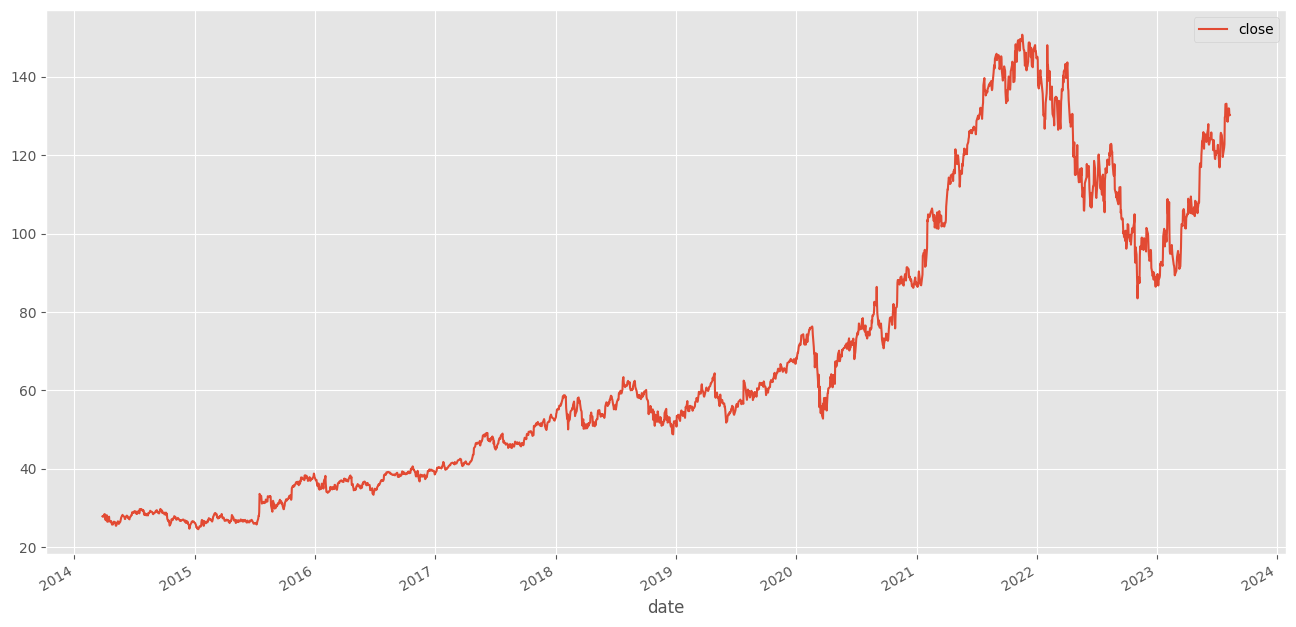

In [42]:
style.use("ggplot")
df_google.plot(x="date", y="close", figsize=(16,8))
plt.show()

In [43]:
def func1():
    y = df_google["close"]
    c = np.zeros(1180)
    n1 = 0
    n2 = 2
    for i in range(1179):
        c[i] = sum(y[n1:n2])/2
        n1+=2
        n2+=2
    c[1179] = sum(y[n1:n2])/2
    return c
def func2():
    x = df_google["date"]
    d = [0 for i in range(1180)]
    n1 = 0
    n2 = 2
    for i in range(1179):
        d[i] = x[n1]
        d[i+1] = x[n2]
        n1+=2
        n2+=2
    return d

In [44]:
#%%timeit
#print(func1())
#print(func2())

<function matplotlib.pyplot.show(close=None, block=None)>

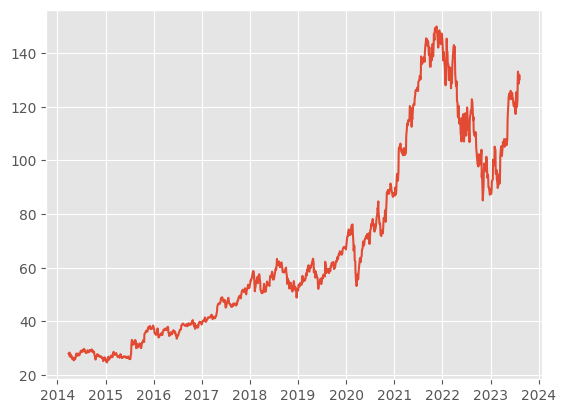

In [45]:
plt.plot(func2(),func1())
plt.show

In [46]:
i = 0

# Empty list to store moving averages
moving_averages = []
window_size = 100
arr = df_google["close"]
fill_length = len(arr) - (window_size - 1)
while i < fill_length:  
 # Calc average of current window
    window_avg = sum(arr[i:i+window_size]) / window_size
    window_avg_rounded = round(window_avg, 2)
    # Append average of current window to moving average list
    moving_averages.append(window_avg_rounded)
    i += 1 #move right by one to calc moving average for new window
last_val = moving_averages[len(moving_averages)-1]
for i in range(1,window_size):
    moving_averages.append(last_val)

df_google["close_trend"] = moving_averages

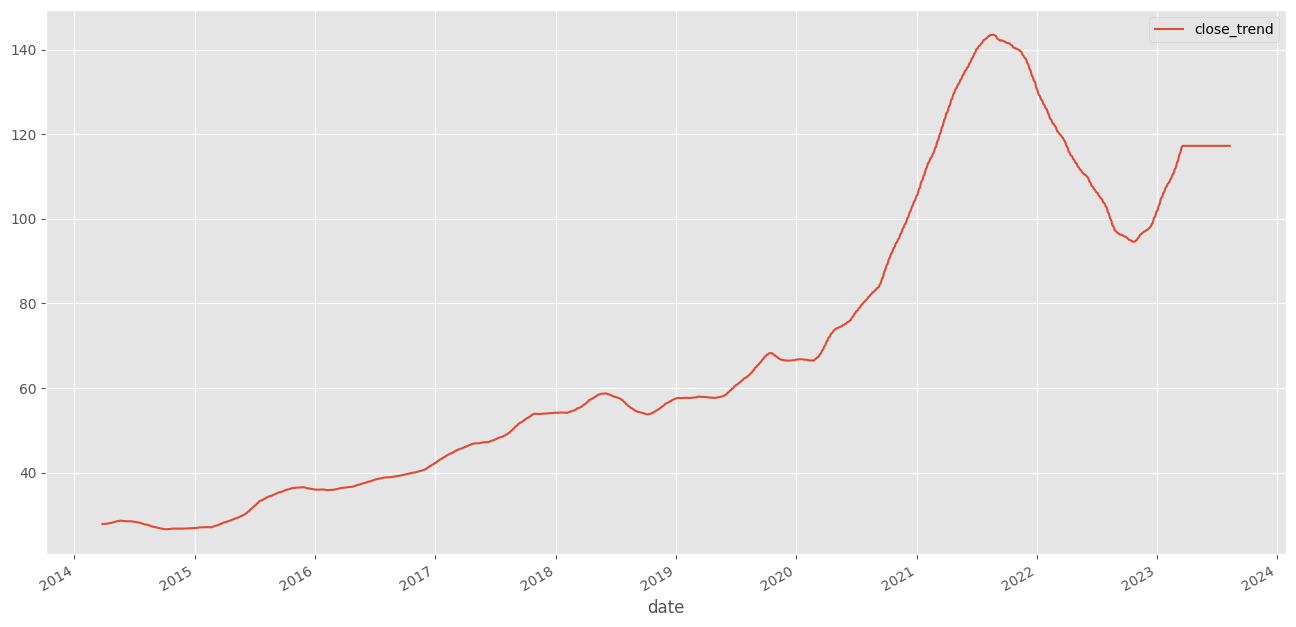

In [47]:
style.use("ggplot")
df_google.plot(x="date", y="close_trend", figsize=(16,8))
plt.show()